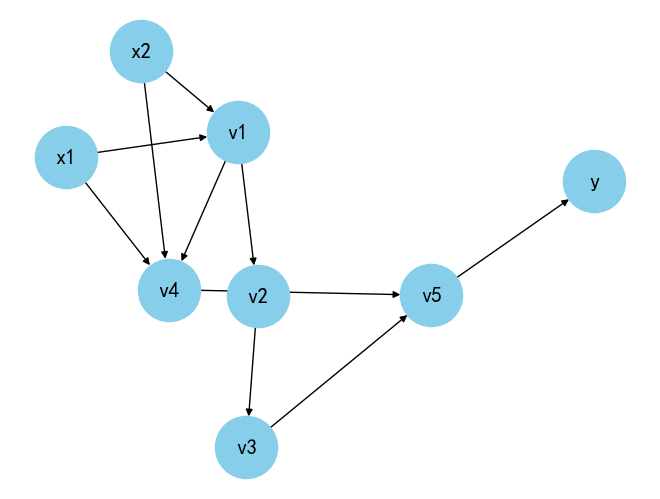

节点y对x1导数: tensor([0.])
节点y对x2导数: tensor([0.0046])
节点v1对x1导数: tensor([0.])
节点v1对x2导数: tensor([0.0904])
节点v2对x1导数: tensor([0.])
节点v2对x2导数: tensor([0.2711])
节点v3对x1导数: tensor([0.])
节点v3对x2导数: tensor([0.0055])
节点v4对x1导数: tensor([0.])
节点v4对x2导数: tensor([0.0904])
节点v5对x1导数: tensor([0.])
节点v5对x2导数: tensor([0.0958])


In [4]:
import torch
import matplotlib.pyplot as plt
import networkx as nx

# 定义函数
def forward(x1, x2):
    # 计算内部节点
    v1 = torch.sigmoid(x1**2 + 2*x2 + 1)
    v2 = 3 * v1 + 1
    v3 = torch.sigmoid(v2)
    v4 = torch.sigmoid(x1**2 + 2*x2 + 1)
    v5 = v3 + v4 + 1
    
    # 计算最终输出
    y = torch.sigmoid(v5)
    
    # 返回所有节点和最终输出
    return y, v1, v2, v3, v4, v5

# 设置x1和x2的值，并开启梯度追踪
x1 = torch.tensor([0.0], requires_grad=True)
x2 = torch.tensor([1.0], requires_grad=True)

# 计算y的值以及所有内部节点的值
y, v1, v2, v3, v4, v5 = forward(x1, x2)

# 创建一个有向图
G = nx.DiGraph()

# 添加节点
nodes = ['x1', 'x2', 'v1', 'v2', 'v3', 'v4', 'v5', 'y']
G.add_nodes_from(nodes)

# 添加边
edges = [('x1', 'v1'), ('x2', 'v1'), ('v1', 'v2'), ('v2', 'v3'), ('x1', 'v4'), ('x2', 'v4'), ('v1', 'v4'), ('v3', 'v5'), ('v4', 'v5'), ('v5', 'y')]
G.add_edges_from(edges)

# 绘制计算图
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)

# 显示计算图
plt.show()

# 计算y关于x1和x2的梯度
y.backward(retain_graph=True)  # 保留计算图

# 输出梯度
print(f"节点y对x1导数: {x1.grad}")
print(f"节点y对x2导数: {x2.grad}")

# 计算并输出每个内部节点关于x1和x2的梯度
gradients = {
    'v1': torch.autograd.grad(v1, (x1, x2), grad_outputs=torch.ones_like(v1), retain_graph=True),
    'v2': torch.autograd.grad(v2, (x1, x2), grad_outputs=torch.ones_like(v2), retain_graph=True),
    'v3': torch.autograd.grad(v3, (x1, x2), grad_outputs=torch.ones_like(v3), retain_graph=True),
    'v4': torch.autograd.grad(v4, (x1, x2), grad_outputs=torch.ones_like(v4), retain_graph=True),
    'v5': torch.autograd.grad(v5, (x1, x2), grad_outputs=torch.ones_like(v5), retain_graph=True),
}

# 打印梯度
for node_name, (grad_x1, grad_x2) in gradients.items():
    print(f"节点{node_name}对x1导数: {grad_x1}")
    print(f"节点{node_name}对x2导数: {grad_x2}")